# DSC 2022 - TensorMath

# 1. Impor paket/pustaka
disini kami menggunakan beberapa pustaka yang sederhana seperti pandas untuk mengolah dataframe, numpy untuk transformasi data, matplotlib dan seaborn untuk visualisasi, scipy untuk mendapatkan nilai statistik, dan warnings untuk membisukan peringatan

In [274]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import tensorflow as tf

# 2. Preprocessing Data

terlebih dahulu peniliti perlu memuat data (```data_train.csv```) ke dalam bentuk dataframe menggunakan ```pd.read_csv(...)```. Setelah data dimuat, atur kolom ```Id``` sebagai index dataframe, lalu peniliti menghapus kolom ```Kabupaten/Kota``` dan ```Peringkat Indeks Pembangunan Manusia``` dengan menggunakan fungsi ```select_dtypes(include='number')```. Digunakan fungsi tersebut dikarenakan kolom ```Kabupaten/Kota``` dan ```Peringkat Indeks Pembangunan Manusia``` memiliki beberapa atau semua data bertipe ```string```

In [275]:
data_train = pd.read_csv('Data_Train.csv').set_index(keys="Id").select_dtypes(include='number')

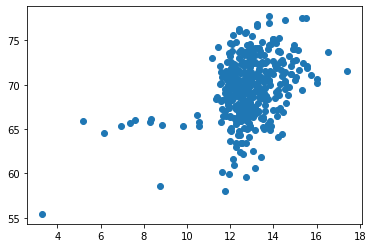

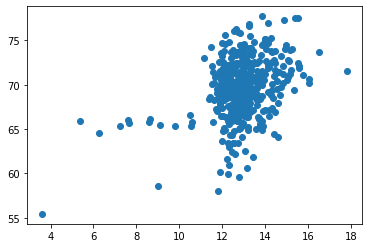

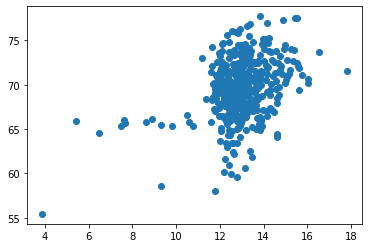

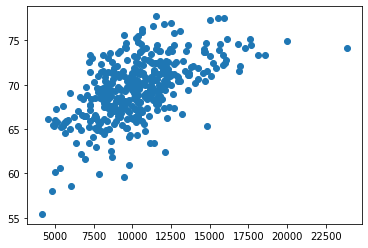

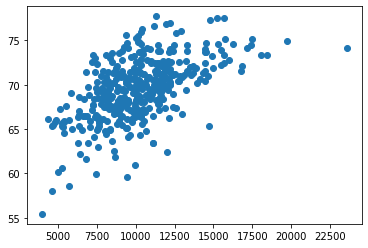

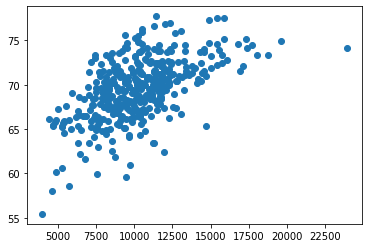

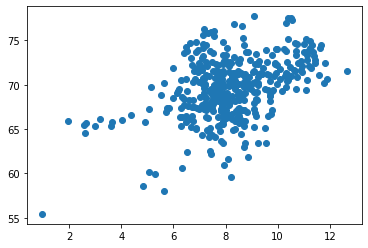

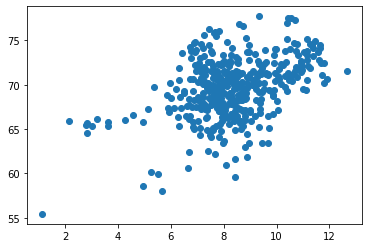

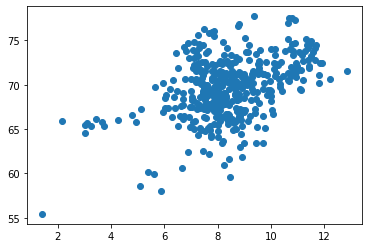

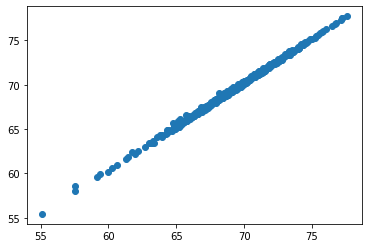

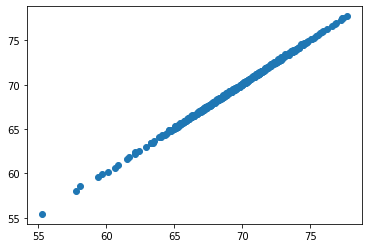

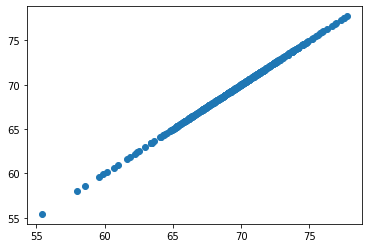

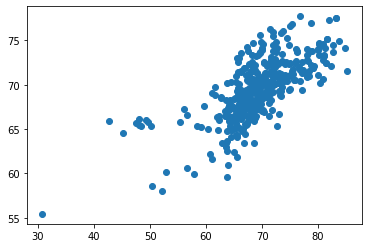

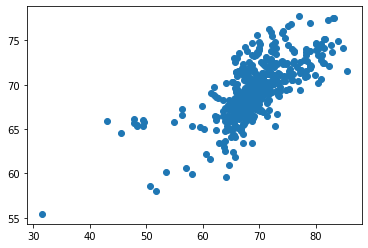

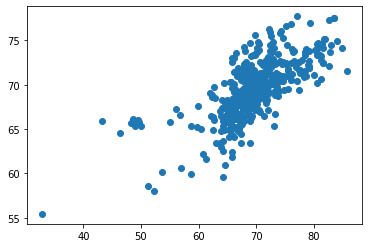

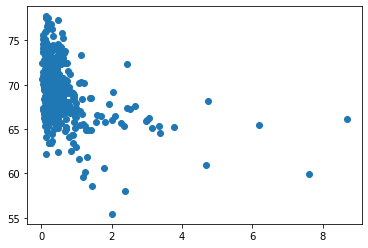

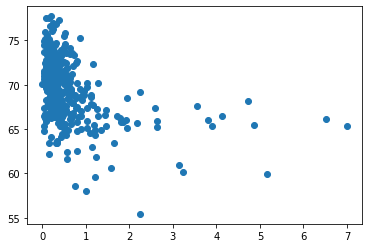

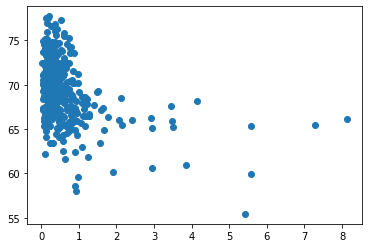

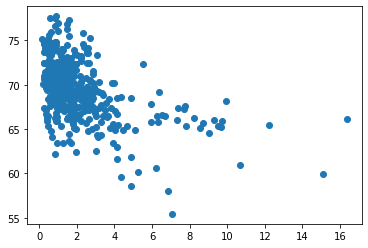

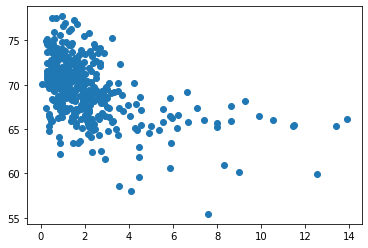

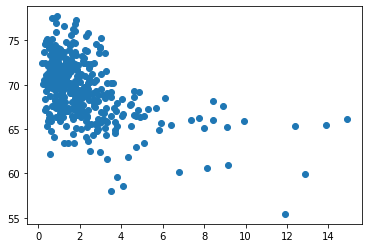

In [276]:
for i in data_train.columns:
    plt.scatter(data_train[i], data_train['Umur Harapan Hidup Saat Lahir (UHH) (2021)'])
    plt.show()

In [278]:
data_train.corr()['Umur Harapan Hidup Saat Lahir (UHH) (2021)']

Harapan Lama Sekolah (2019)                                        0.378417
Harapan Lama Sekolah (2020)                                        0.374038
Harapan Lama Sekolah (2021)                                        0.369594
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)       0.575418
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)      0.568919
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)      0.575288
Rata-rata Lama Sekolah (2019)                                      0.441071
Rata-rata Lama Sekolah (2020)                                      0.437374
Rata-rata Lama Sekolah (2021)                                      0.440273
Umur Harapan Hidup Saat Lahir (UHH) (2019)                         0.999178
Umur Harapan Hidup Saat Lahir (UHH) (2020)                         0.999792
Umur Harapan Hidup Saat Lahir (UHH) (2021)                         1.000000
Indeks Pembangunan Manusia (2019)                                  0.712349
Indeks Pemba

Selanjutnya peniliti membuat fungsi ```distribusi(data)``` untuk menampilkan distribusi beserta <i>skewness</i>, fungsi ```transform(data)``` untuk mengtransformasikan data dengan <i>log transformation</i>, dan fungsi ```remove_outliers(data)``` untuk menghapus baris yang memiliki data pencilan

In [153]:
def distribusi(data_train):
    for i in data_train.columns:    
        t=sns.distplot(data_train[i],label="Skewness: %.4f"%(data_train[i].skew()) )
        t.legend()
        plt.show()
        
def cari(a,b):    
    
    terdekat = b[0]
    jarak = abs(terdekat - a)
    for i in b:
        if(abs(i-a)<=jarak):
            terdekat = i
            jarak = abs(terdekat-a)

#     print(terdekat)
    return terdekat
        
def fences(df, variable_name):    
    q1 = df[variable_name].quantile(0.25)
    q3 = df[variable_name].quantile(0.75)
    iqr = q3-q1
    outer_fence = 3*iqr
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    return outer_fence_le, outer_fence_ue
        
def transform(new_df):
    for i in new_df.columns:        
        if 'P2' not in i and 'UHH' not in i:            
            new_df[i] = np.log(new_df[i])
        elif 'P2' in i:
            new_df[i] = np.sqrt(new_df[i])
    return new_df

def remove_outliers(new_df):
    for i in new_df.columns:    
        percentile25 = new_df[i].quantile(0.25)
        percentile75 = new_df[i].quantile(0.75)
        iqr = percentile75 - percentile25
        upper_limit = percentile75 + 1.5 * iqr
        lower_limit = percentile25 - 1.5 * iqr
        new_df[new_df[i] > upper_limit]
        new_df[new_df[i] < lower_limit]
        new_df = new_df[new_df[i] < upper_limit]            
    return new_df

In [138]:
data_train = transform(data_train)

In [139]:
ue = []
for i in data_train.columns:
    outer_fence_le, outer_fence_ue = fences(data_train, i)
    print(i)
    print('Lower end outer fence: ', outer_fence_le)
    #-10.7030675
    print('Upper end outer fence: ', outer_fence_ue)
    ue.append(outer_fence_ue)
    print('\n')    
ue
#14.46219500

Harapan Lama Sekolah (2019)
Lower end outer fence:  2.2354635471972353
Upper end outer fence:  2.87226609108345


Harapan Lama Sekolah (2020)
Lower end outer fence:  2.248779065903128
Upper end outer fence:  2.86682539263513


Harapan Lama Sekolah (2021)
Lower end outer fence:  2.2449043655084746
Upper end outer fence:  2.8833002441605706


Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)
Lower end outer fence:  8.119229411618715
Upper end outer fence:  10.312827893553356


Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)
Lower end outer fence:  8.107465586479078
Upper end outer fence:  10.28951943266195


Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)
Lower end outer fence:  8.115242566256278
Upper end outer fence:  10.302077288855612


Rata-rata Lama Sekolah (2019)
Lower end outer fence:  1.3151506826427224
Upper end outer fence:  2.880039232743725


Rata-rata Lama Sekolah (2020)
Lower end outer fence:  1.34444502196504
Upper end outer fence:  

[2.87226609108345,
 2.86682539263513,
 2.8833002441605706,
 10.312827893553356,
 10.28951943266195,
 10.302077288855612,
 2.880039232743725,
 2.888536129550393,
 2.886376136871876,
 85.22500000000002,
 85.00999999999998,
 85.21500000000003,
 4.5595956426934645,
 4.564669463048922,
 4.568893280997674,
 1.9299999999999997,
 1.8599999999999999,
 1.94,
 4.243826928974081,
 3.809702931495345,
 3.88266181724759]

In [140]:
L=[0.9, 0.925, 0.95, 0.975, 0.99, 0.999, 1]
index_terdekat = []
for j,i in enumerate(data_train.columns):
#Explore different quantiles at the upper end
    print(i)
    Q = []
    for k in L:
        Q.append(data_train[i].quantile(k))
    
    terdekat = cari(ue[j], Q)
    print('90% quantile:   ', data_train[i].quantile(0.90))       #10.75
    print('92.5% quantile: ', data_train[i].quantile(0.925))      #13.54
    print('95% quantile:   ', data_train[i].quantile(0.95))       #15.79
    print('97.5% quantile: ', data_train[i].quantile(0.975))      #23.93
    print('99% quantile:   ', data_train[i].quantile(0.99))       #41.37
    print('99.9% quantile: ', data_train[i].quantile(0.999))      #81.18
    for index, k in enumerate(Q):
        if(k == terdekat):
            index_terdekat.append(L[index])            
            print(ue[j],'-',L[index])
            
    print('\n')
    
    

Harapan Lama Sekolah (2019)
90% quantile:    2.661238020754016
92.5% quantile:  2.6762154775821916
95% quantile:    2.695775122391471
97.5% quantile:  2.7289898240393953
99% quantile:    2.7549948164725313
99.9% quantile:  2.8348121257699272
2.87226609108345 - 1


Harapan Lama Sekolah (2020)
90% quantile:    2.6659769026873423
92.5% quantile:  2.679168403240278
95% quantile:    2.7021645562273884
97.5% quantile:  2.7302334068066716
99% quantile:    2.755630709394083
99.9% quantile:  2.848566219842273
2.86682539263513 - 1


Harapan Lama Sekolah (2021)
90% quantile:    2.670000695371439
92.5% quantile:  2.6842008798165926
95% quantile:    2.705446392813477
97.5% quantile:  2.7352757575265305
99% quantile:    2.756419847462374
99.9% quantile:  2.84914570983921
2.8833002441605706 - 1


Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)
90% quantile:    9.516795129751248
92.5% quantile:  9.58744156115717
95% quantile:    9.62708837350389
97.5% quantile:  9.689018502798382
99% quan

21
21
1


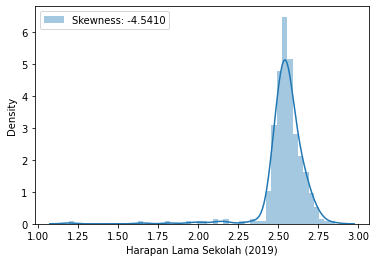

1


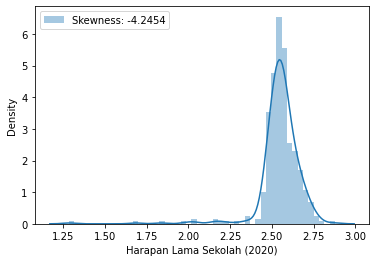

1


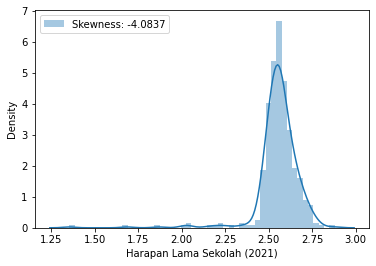

1


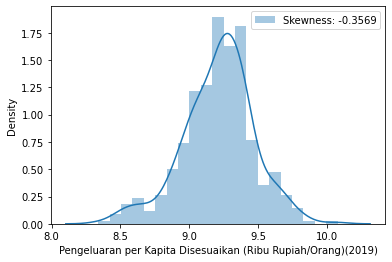

1


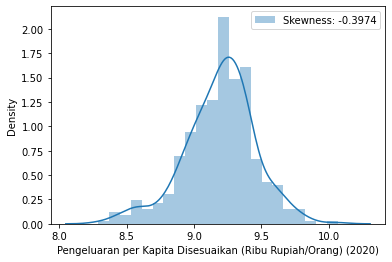

1


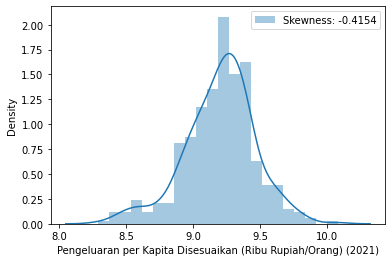

1


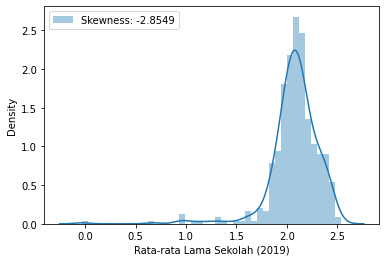

1


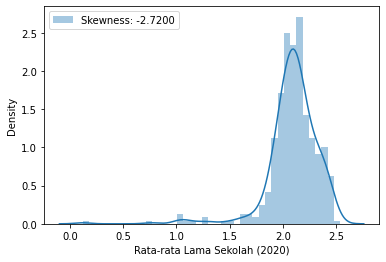

1


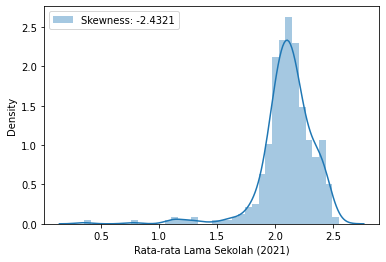

1


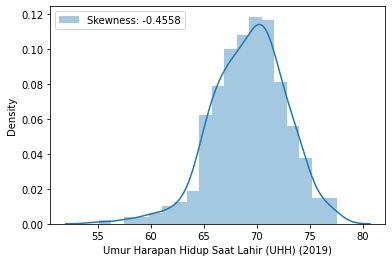

1


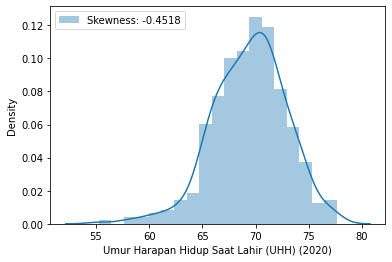

1


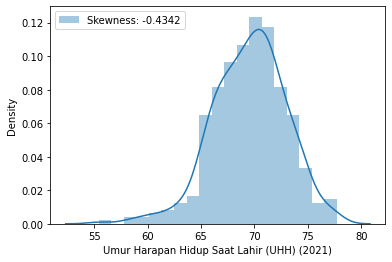

1


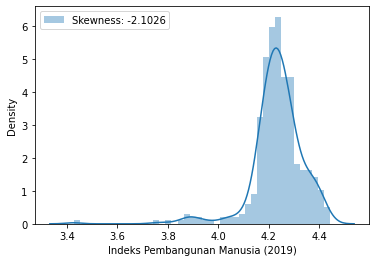

1


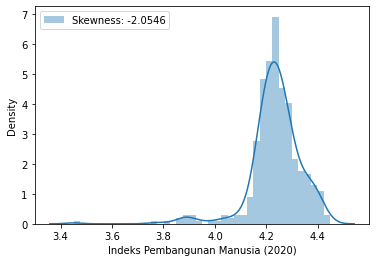

1


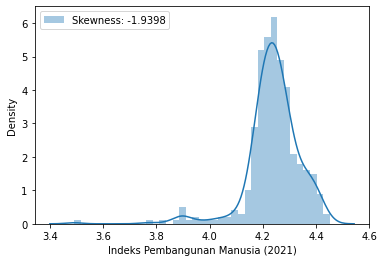

0.95


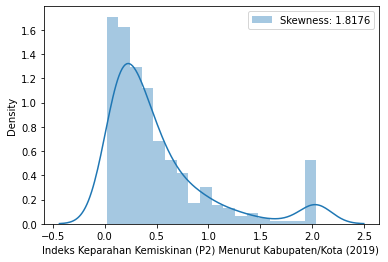

0.95


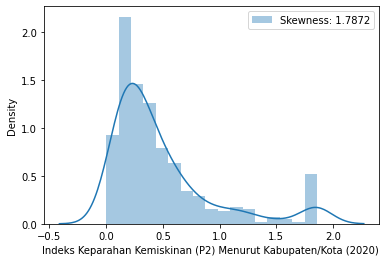

0.95


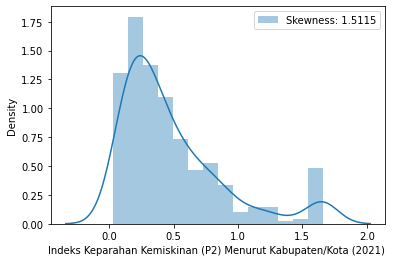

1


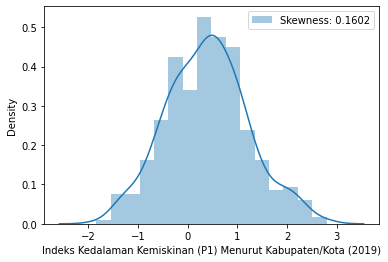

1


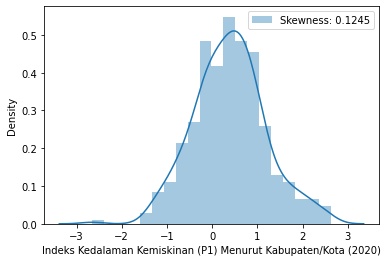

1


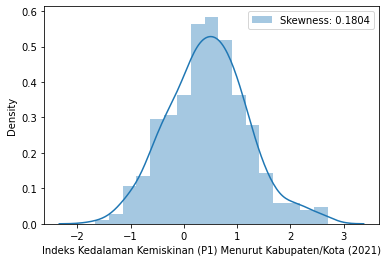

In [141]:
winsore_df = data_train
limit = index_terdekat
print(len(limit))
print(len(winsore_df.columns))
for j,i in enumerate(winsore_df.columns):
    print(limit[j])
    winsore_df[i] = stats.mstats.winsorize(winsore_df[i], limits = (0,1-limit[j]))
    t=sns.distplot(winsore_df[i],label="Skewness: %.4f"%(winsore_df[i].skew()) )
    t.legend()
    plt.show()

Visualisasi distribusi setiap kolom dengan ```sns.distplot(...)``` sebelum diolah

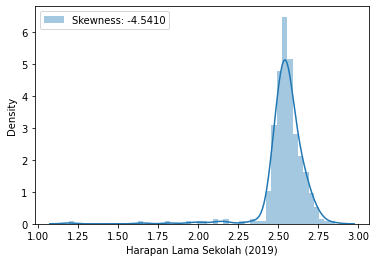

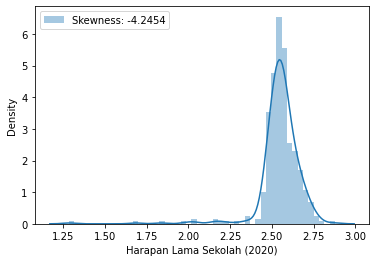

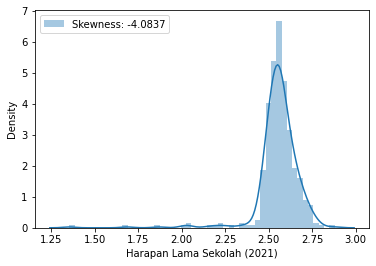

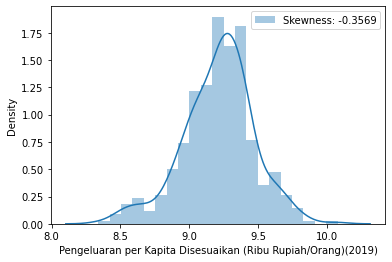

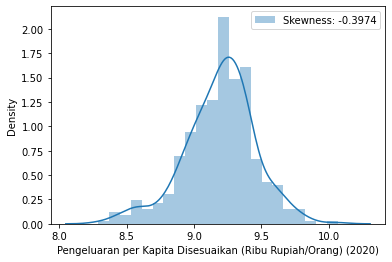

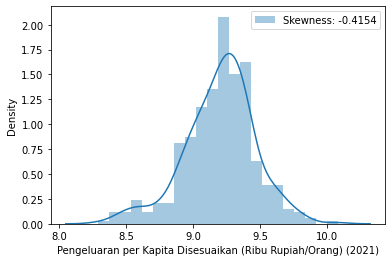

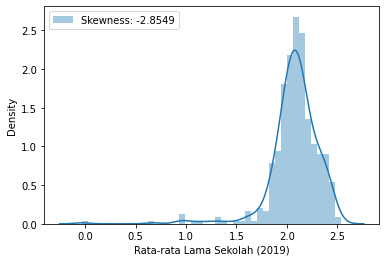

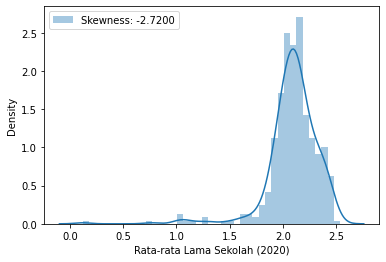

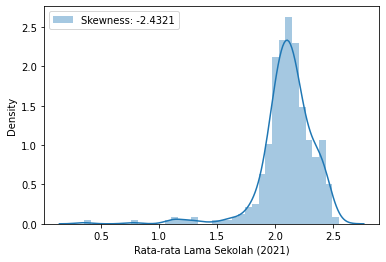

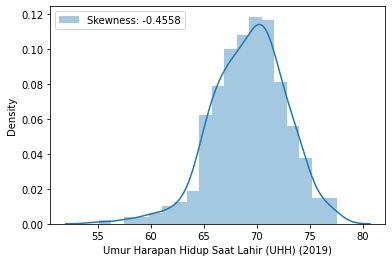

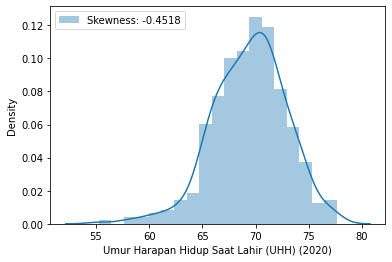

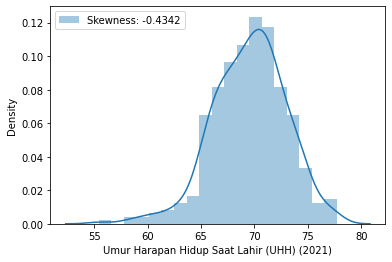

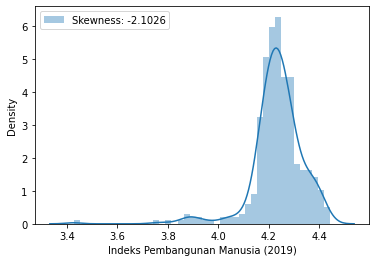

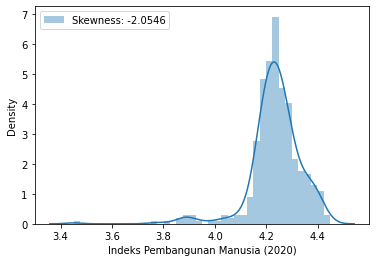

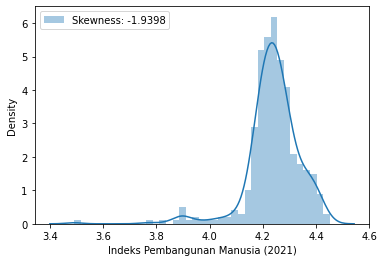

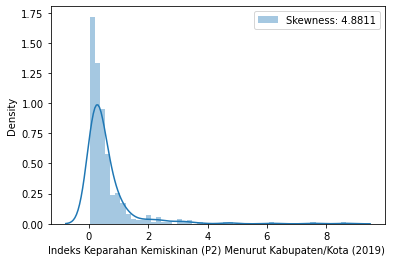

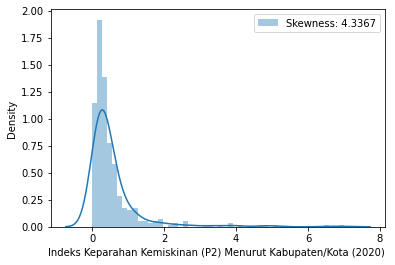

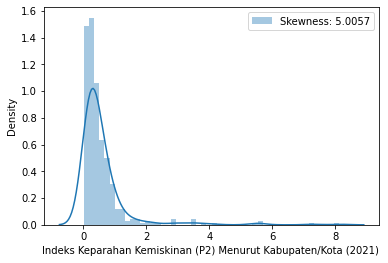

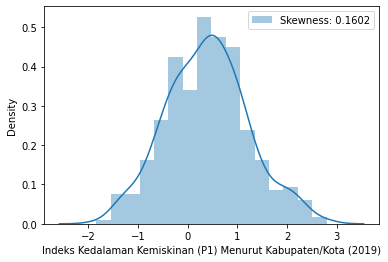

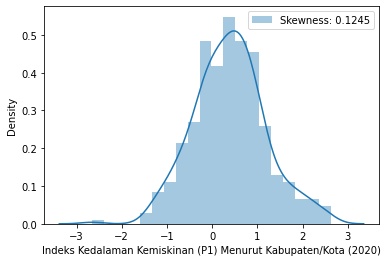

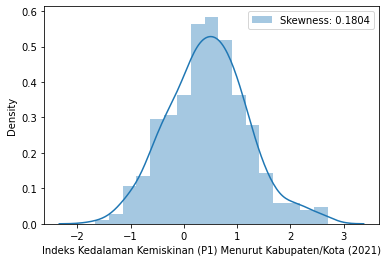

In [135]:
distribusi(data_train)

In [409]:
for i in data_train.columns:    
        t=sns.distplot(data_train[i],label="Skewness: %.4f"%(data_train[i].skew()) )
        t.legend()
        plt.show()

Selanjutnya peniliti mengtransformasikan ```data_train``` dengan fungsi ```transform``` 

In [182]:
new_df = transform(data_train)
# new_df = data_train
new_df

,Harapan Lama Sekolah (2019),Harapan Lama Sekolah (2020),Harapan Lama Sekolah (2021),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021),Rata-rata Lama Sekolah (2019),Rata-rata Lama Sekolah (2020),Rata-rata Lama Sekolah (2021),Umur Harapan Hidup Saat Lahir (UHH) (2019),...,Umur Harapan Hidup Saat Lahir (UHH) (2021),Indeks Pembangunan Manusia (2019),Indeks Pembangunan Manusia (2020),Indeks Pembangunan Manusia (2021),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)
Id,,,,,,,,,,,,,,,,,,,,,
1,2.541602,2.564949,2.574138,8.890686,8.884749,8.887929,1.986504,1.987874,1.989243,67.50,...,67.69,4.159820,4.164648,4.167440,0.34,0.38,0.38,0.494696,0.647103,0.760806
2,2.589267,2.590017,2.590767,9.289152,9.234350,9.240773,2.149434,2.150599,2.169054,68.44,...,68.60,4.259576,4.252914,4.257030,0.32,0.32,0.23,0.246860,0.364643,0.131028
3,2.542389,2.543176,2.546315,9.135509,9.105646,9.111293,1.764731,1.776646,1.798404,66.92,...,67.36,4.166510,4.165424,4.170843,2.42,2.58,1.66,2.000128,1.958685,1.738710
5,2.571084,2.571849,2.572612,9.005896,8.979920,8.983942,2.169054,2.181547,2.206074,68.17,...,69.05,4.214938,4.216857,4.223177,0.78,0.47,0.51,1.061257,0.678034,0.698135
8,2.542389,2.543176,2.543961,9.464595,9.463120,9.468001,2.330200,2.333114,2.345645,70.76,...,70.95,4.318554,4.319752,4.323072,0.31,0.56,0.28,0.385262,0.553885,0.314811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2.582487,2.583243,2.583998,9.194414,9.164715,9.169831,2.109000,2.142416,2.143589,70.61,...,70.88,4.253625,4.255896,4.257030,0.26,0.21,0.23,0.139762,0.048790,0.086178
507,2.481568,2.485740,2.510412,9.334150,9.324294,9.333443,2.033398,2.064328,2.065596,69.31,...,69.59,4.234686,4.239599,4.246636,0.11,0.12,0.14,-0.544727,-0.544727,-0.385662
508,2.525729,2.526528,2.534490,8.988196,8.925853,8.962135,2.065596,2.075684,2.101692,71.90,...,72.33,4.213312,4.206035,4.218772,0.55,0.29,0.37,0.662688,0.378436,0.570980


Setelah mengtransformasikan data, hapus pencilan pada data dengan fungsi ```remove_outliers(new_df)```

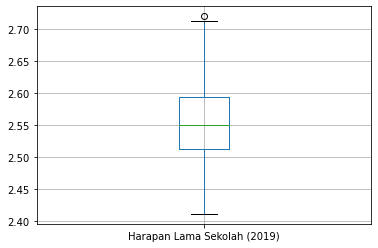

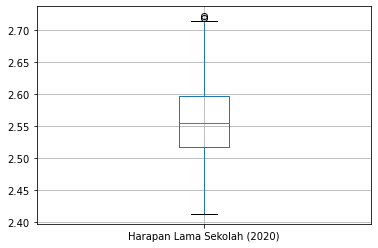

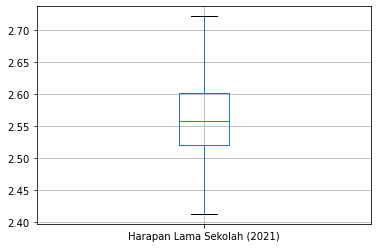

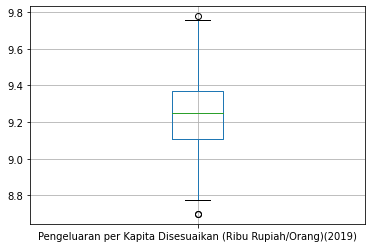

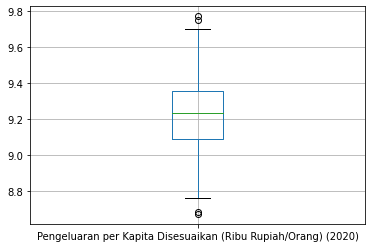

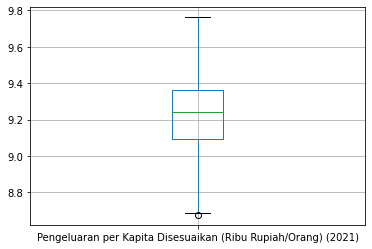

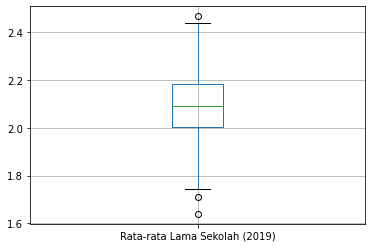

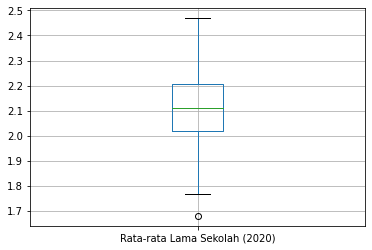

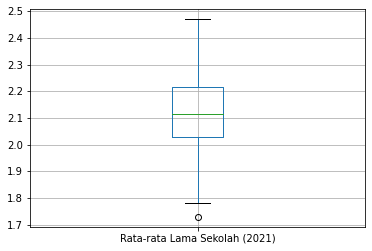

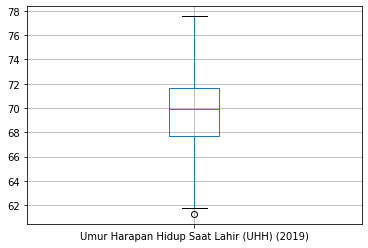

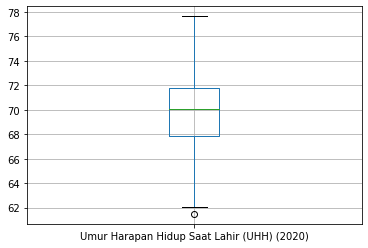

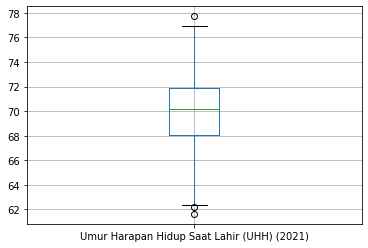

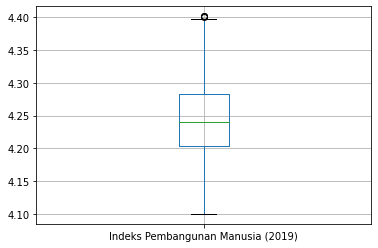

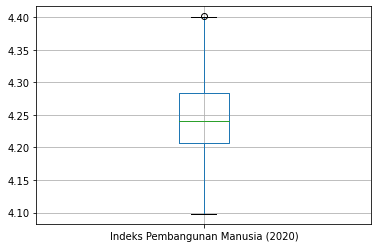

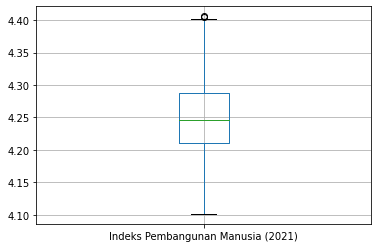

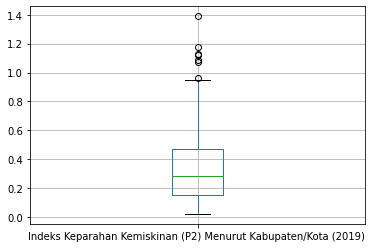

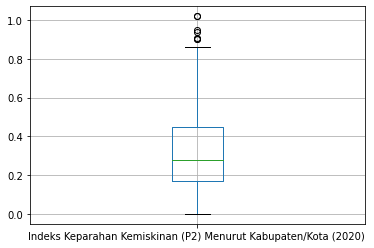

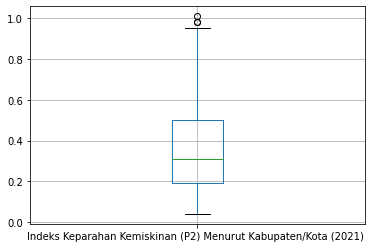

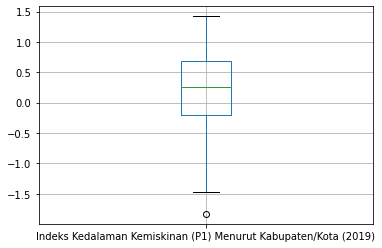

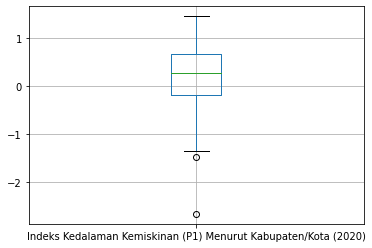

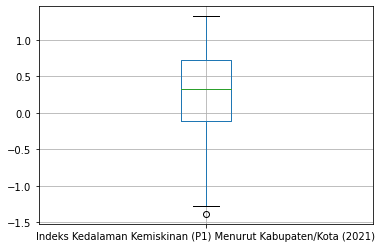

In [183]:
new_df = remove_outliers(new_df)
for i in new_df.columns:
    pd.DataFrame(new_df[i]).boxplot()
    plt.show()

Tampilan visualisasi distribusi dari data ```new_df```

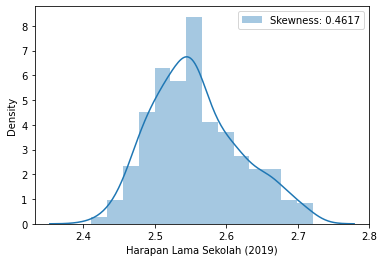

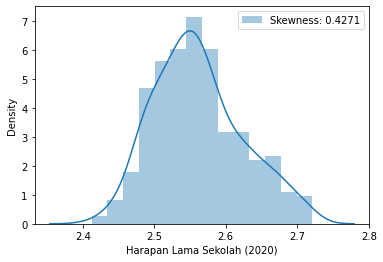

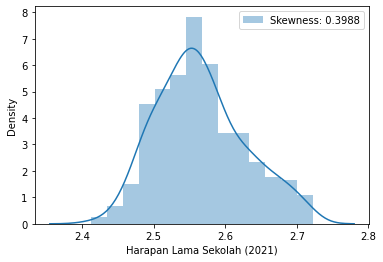

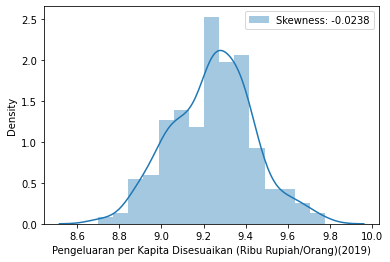

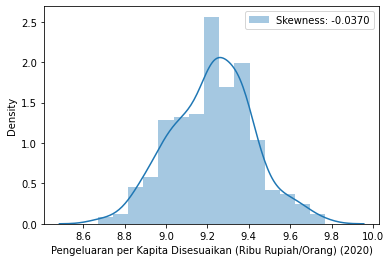

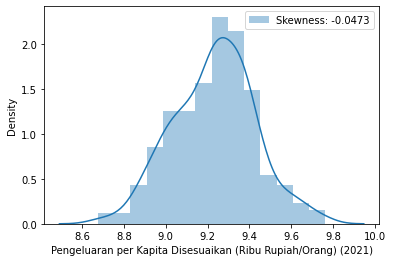

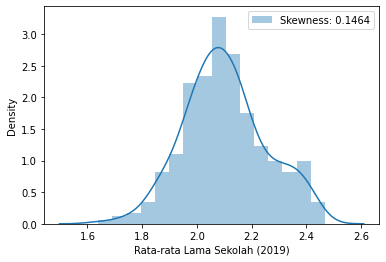

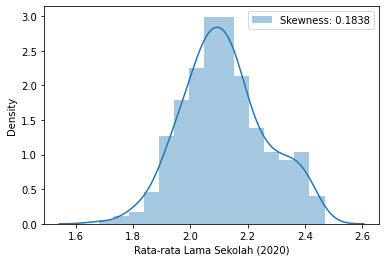

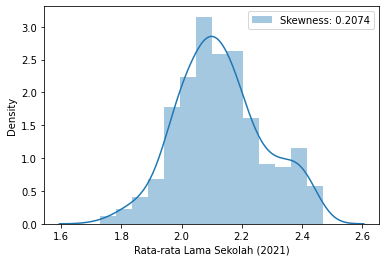

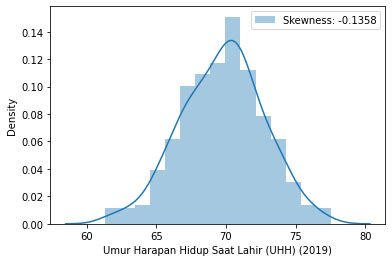

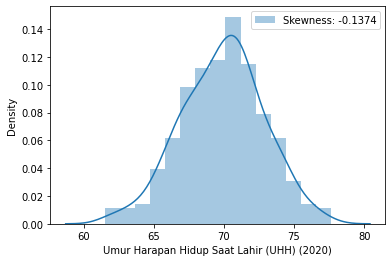

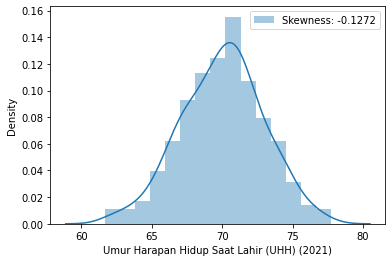

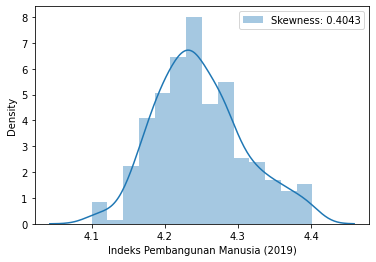

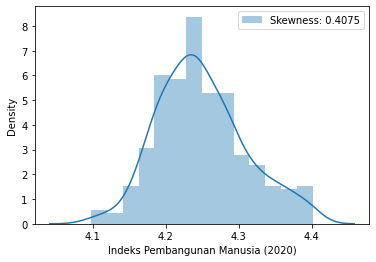

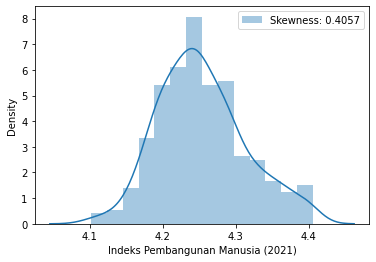

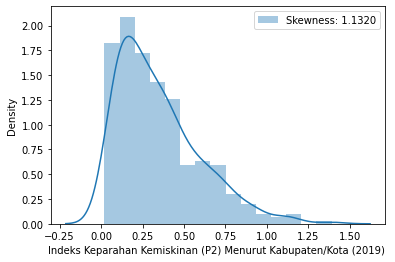

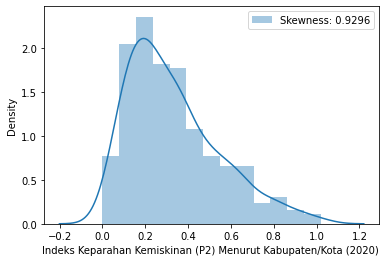

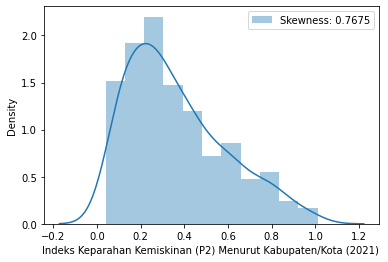

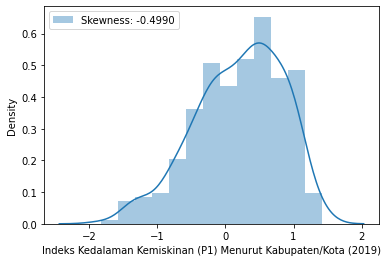

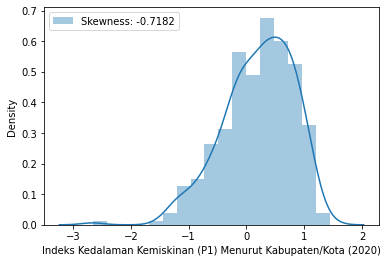

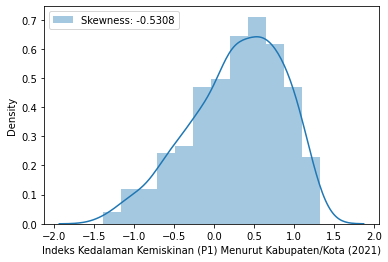

In [143]:
distribusi(new_df)

Sekarang data tersebut sudah berdistribusi normal. lalu kita perlu memisah kolom yang sebagai Variabel Terikat (y atau label) yaitu kolom ```'Umur Harapan Hidup Saat Lahir (UHH) (2021)'``` dan sisanya sebagai variabel bebas (X atau fitur).

In [147]:
new_df = winsore_df

In [156]:
cols_to_drop = ['Umur Harapan Hidup Saat Lahir (UHH) (2021)']
fitur = new_df.drop(cols_to_drop, axis=1).astype('float32')
label = new_df['Umur Harapan Hidup Saat Lahir (UHH) (2021)'].astype('float32')
fitur

,Harapan Lama Sekolah (2019),Harapan Lama Sekolah (2020),Harapan Lama Sekolah (2021),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021),Rata-rata Lama Sekolah (2019),Rata-rata Lama Sekolah (2020),Rata-rata Lama Sekolah (2021),Umur Harapan Hidup Saat Lahir (UHH) (2019),Umur Harapan Hidup Saat Lahir (UHH) (2020),Indeks Pembangunan Manusia (2019),Indeks Pembangunan Manusia (2020),Indeks Pembangunan Manusia (2021),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)
Id,,,,,,,,,,,,,,,,,,,,
1,2.541602,2.564949,2.574138,8.890686,8.884748,8.887929,1.986504,1.987874,1.989243,67.500000,67.660004,4.159820,4.164648,4.167440,0.34,0.38,0.38,0.494696,0.647103,0.760806
2,2.589267,2.590017,2.590767,9.289151,9.234350,9.240772,2.149434,2.150599,2.169054,68.440002,68.550003,4.259576,4.252914,4.257030,0.32,0.32,0.23,0.246860,0.364643,0.131028
5,2.571084,2.571849,2.572612,9.005896,8.979920,8.983941,2.169054,2.181547,2.206074,68.169998,68.760002,4.214939,4.216857,4.223177,0.78,0.47,0.51,1.061257,0.678034,0.698135
8,2.542389,2.543175,2.543962,9.464595,9.463120,9.468001,2.330200,2.333114,2.345644,70.760002,70.870003,4.318554,4.319752,4.323072,0.31,0.56,0.28,0.385262,0.553885,0.314811
9,2.482404,2.483239,2.493206,9.113609,9.117567,9.128588,1.868721,1.885553,1.887070,66.239998,66.389999,4.158883,4.162937,4.167595,0.41,0.68,0.29,0.703098,0.955511,0.494696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2.582487,2.583243,2.583997,9.194414,9.164715,9.169831,2.109000,2.142416,2.143589,70.610001,70.879997,4.253625,4.255897,4.257030,0.26,0.21,0.23,0.139762,0.048790,0.086178
507,2.481568,2.485740,2.510412,9.334149,9.324294,9.333443,2.033398,2.064328,2.065596,69.309998,69.449997,4.234686,4.239599,4.246636,0.11,0.12,0.14,-0.544727,-0.544727,-0.385662
508,2.525729,2.526528,2.534490,8.988196,8.925853,8.962135,2.065596,2.075685,2.101692,71.900002,72.099998,4.213312,4.206035,4.218772,0.55,0.29,0.37,0.662688,0.378436,0.570980


# 3. Processing

Setelah melakukan <i>preprocessing</i> pada data, selanjutnya masuk tahap processing dimana peniliti dimulai dengan memisahkan data latih dan data tes menggunakan ```train_test_split(...)```

In [248]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fitur, label, test_size=.3, random_state=12)
print('Dimensi X_train :',X_train.shape)
print('Dimensi X_test  :',X_test.shape)


Dimensi X_train : (231, 20)
Dimensi X_test  : (99, 20)


In [223]:
import tensorflow.keras.backend as K
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

Peneliti membangun model Regresi Linier dengan menggunakan ```LinearRegression()```

In [244]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape = [20,], activation='relu'),        
    tf.keras.layers.Dense(32, activation='relu'),   
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1),        
])

model.compile(loss=rmse,              
              optimizer=tf.keras.optimizers.Adam(0.01))
model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 32)                672       
                                                                 
 dense_33 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense_34 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,889
Trainable params: 1,825
Non-trainable params: 64
__________________________________________________

In [245]:
history = model.fit(X_train, y_train, epochs=1024, verbose=2, batch_size = 128)

Epoch 1/1024
2/2 - 1s - loss: 69.9460 - 925ms/epoch - 463ms/step
Epoch 2/1024
2/2 - 0s - loss: 69.7675 - 32ms/epoch - 16ms/step
Epoch 3/1024
2/2 - 0s - loss: 69.5967 - 6ms/epoch - 3ms/step
Epoch 4/1024
2/2 - 0s - loss: 69.4030 - 9ms/epoch - 4ms/step
Epoch 5/1024
2/2 - 0s - loss: 69.1848 - 15ms/epoch - 8ms/step
Epoch 6/1024
2/2 - 0s - loss: 68.9391 - 9ms/epoch - 4ms/step
Epoch 7/1024
2/2 - 0s - loss: 68.6614 - 9ms/epoch - 4ms/step
Epoch 8/1024
2/2 - 0s - loss: 68.3479 - 10ms/epoch - 5ms/step
Epoch 9/1024
2/2 - 0s - loss: 67.9986 - 9ms/epoch - 5ms/step
Epoch 10/1024
2/2 - 0s - loss: 67.6139 - 35ms/epoch - 17ms/step
Epoch 11/1024
2/2 - 0s - loss: 67.1902 - 5ms/epoch - 3ms/step
Epoch 12/1024
2/2 - 0s - loss: 66.7287 - 8ms/epoch - 4ms/step
Epoch 13/1024
2/2 - 0s - loss: 66.2236 - 9ms/epoch - 4ms/step
Epoch 14/1024
2/2 - 0s - loss: 65.6739 - 4ms/epoch - 2ms/step
Epoch 15/1024
2/2 - 0s - loss: 65.0794 - 6ms/epoch - 3ms/step
Epoch 16/1024
2/2 - 0s - loss: 64.4370 - 12ms/epoch - 6ms/step
Epoch 

Epoch 133/1024
2/2 - 0s - loss: 0.4760 - 10ms/epoch - 5ms/step
Epoch 134/1024
2/2 - 0s - loss: 0.3764 - 8ms/epoch - 4ms/step
Epoch 135/1024
2/2 - 0s - loss: 0.2366 - 5ms/epoch - 2ms/step
Epoch 136/1024
2/2 - 0s - loss: 0.3927 - 30ms/epoch - 15ms/step
Epoch 137/1024
2/2 - 0s - loss: 0.4362 - 10ms/epoch - 5ms/step
Epoch 138/1024
2/2 - 0s - loss: 0.4946 - 9ms/epoch - 5ms/step
Epoch 139/1024
2/2 - 0s - loss: 0.3248 - 4ms/epoch - 2ms/step
Epoch 140/1024
2/2 - 0s - loss: 0.2031 - 12ms/epoch - 6ms/step
Epoch 141/1024
2/2 - 0s - loss: 0.4062 - 8ms/epoch - 4ms/step
Epoch 142/1024
2/2 - 0s - loss: 0.2679 - 4ms/epoch - 2ms/step
Epoch 143/1024
2/2 - 0s - loss: 0.2141 - 11ms/epoch - 6ms/step
Epoch 144/1024
2/2 - 0s - loss: 0.2288 - 4ms/epoch - 2ms/step
Epoch 145/1024
2/2 - 0s - loss: 0.3792 - 78ms/epoch - 39ms/step
Epoch 146/1024
2/2 - 0s - loss: 0.2215 - 5ms/epoch - 3ms/step
Epoch 147/1024
2/2 - 0s - loss: 0.1383 - 7ms/epoch - 4ms/step
Epoch 148/1024
2/2 - 0s - loss: 0.1365 - 16ms/epoch - 8ms/step

Epoch 264/1024
2/2 - 0s - loss: 0.1626 - 18ms/epoch - 9ms/step
Epoch 265/1024
2/2 - 0s - loss: 0.1524 - 9ms/epoch - 4ms/step
Epoch 266/1024
2/2 - 0s - loss: 0.0865 - 10ms/epoch - 5ms/step
Epoch 267/1024
2/2 - 0s - loss: 0.3824 - 17ms/epoch - 8ms/step
Epoch 268/1024
2/2 - 0s - loss: 0.2608 - 75ms/epoch - 38ms/step
Epoch 269/1024
2/2 - 0s - loss: 0.1366 - 5ms/epoch - 2ms/step
Epoch 270/1024
2/2 - 0s - loss: 0.3488 - 8ms/epoch - 4ms/step
Epoch 271/1024
2/2 - 0s - loss: 0.3287 - 6ms/epoch - 3ms/step
Epoch 272/1024
2/2 - 0s - loss: 0.2336 - 5ms/epoch - 2ms/step
Epoch 273/1024
2/2 - 0s - loss: 0.2238 - 5ms/epoch - 3ms/step
Epoch 274/1024
2/2 - 0s - loss: 0.4122 - 5ms/epoch - 3ms/step
Epoch 275/1024
2/2 - 0s - loss: 0.3049 - 5ms/epoch - 3ms/step
Epoch 276/1024
2/2 - 0s - loss: 0.1805 - 9ms/epoch - 4ms/step
Epoch 277/1024
2/2 - 0s - loss: 0.5843 - 5ms/epoch - 2ms/step
Epoch 278/1024
2/2 - 0s - loss: 0.3974 - 56ms/epoch - 28ms/step
Epoch 279/1024
2/2 - 0s - loss: 0.2390 - 14ms/epoch - 7ms/step


Epoch 396/1024
2/2 - 0s - loss: 0.4258 - 8ms/epoch - 4ms/step
Epoch 397/1024
2/2 - 0s - loss: 0.5915 - 6ms/epoch - 3ms/step
Epoch 398/1024
2/2 - 0s - loss: 0.5076 - 7ms/epoch - 4ms/step
Epoch 399/1024
2/2 - 0s - loss: 0.4241 - 6ms/epoch - 3ms/step
Epoch 400/1024
2/2 - 0s - loss: 0.4689 - 7ms/epoch - 4ms/step
Epoch 401/1024
2/2 - 0s - loss: 0.4120 - 5ms/epoch - 3ms/step
Epoch 402/1024
2/2 - 0s - loss: 0.4395 - 37ms/epoch - 19ms/step
Epoch 403/1024
2/2 - 0s - loss: 0.5900 - 6ms/epoch - 3ms/step
Epoch 404/1024
2/2 - 0s - loss: 0.4758 - 4ms/epoch - 2ms/step
Epoch 405/1024
2/2 - 0s - loss: 0.1919 - 5ms/epoch - 3ms/step
Epoch 406/1024
2/2 - 0s - loss: 0.4044 - 5ms/epoch - 2ms/step
Epoch 407/1024
2/2 - 0s - loss: 0.6680 - 4ms/epoch - 2ms/step
Epoch 408/1024
2/2 - 0s - loss: 0.1656 - 5ms/epoch - 3ms/step
Epoch 409/1024
2/2 - 0s - loss: 0.4872 - 4ms/epoch - 2ms/step
Epoch 410/1024
2/2 - 0s - loss: 0.1394 - 4ms/epoch - 2ms/step
Epoch 411/1024
2/2 - 0s - loss: 0.2736 - 5ms/epoch - 3ms/step
Epoch 

Epoch 528/1024
2/2 - 0s - loss: 0.3580 - 11ms/epoch - 5ms/step
Epoch 529/1024
2/2 - 0s - loss: 0.4424 - 12ms/epoch - 6ms/step
Epoch 530/1024
2/2 - 0s - loss: 0.5397 - 46ms/epoch - 23ms/step
Epoch 531/1024
2/2 - 0s - loss: 0.3880 - 10ms/epoch - 5ms/step
Epoch 532/1024
2/2 - 0s - loss: 0.2154 - 15ms/epoch - 8ms/step
Epoch 533/1024
2/2 - 0s - loss: 0.4124 - 10ms/epoch - 5ms/step
Epoch 534/1024
2/2 - 0s - loss: 0.3313 - 4ms/epoch - 2ms/step
Epoch 535/1024
2/2 - 0s - loss: 0.2019 - 5ms/epoch - 2ms/step
Epoch 536/1024
2/2 - 0s - loss: 0.3712 - 7ms/epoch - 4ms/step
Epoch 537/1024
2/2 - 0s - loss: 0.2473 - 14ms/epoch - 7ms/step
Epoch 538/1024
2/2 - 0s - loss: 0.2099 - 11ms/epoch - 6ms/step
Epoch 539/1024
2/2 - 0s - loss: 0.2025 - 91ms/epoch - 46ms/step
Epoch 540/1024
2/2 - 0s - loss: 0.1458 - 6ms/epoch - 3ms/step
Epoch 541/1024
2/2 - 0s - loss: 0.4846 - 5ms/epoch - 3ms/step
Epoch 542/1024
2/2 - 0s - loss: 0.4450 - 5ms/epoch - 2ms/step
Epoch 543/1024
2/2 - 0s - loss: 0.2729 - 6ms/epoch - 3ms/st

Epoch 659/1024
2/2 - 0s - loss: 0.3400 - 10ms/epoch - 5ms/step
Epoch 660/1024
2/2 - 0s - loss: 0.3861 - 11ms/epoch - 5ms/step
Epoch 661/1024
2/2 - 0s - loss: 0.2223 - 28ms/epoch - 14ms/step
Epoch 662/1024
2/2 - 0s - loss: 0.1947 - 20ms/epoch - 10ms/step
Epoch 663/1024
2/2 - 0s - loss: 0.2301 - 6ms/epoch - 3ms/step
Epoch 664/1024
2/2 - 0s - loss: 0.7073 - 6ms/epoch - 3ms/step
Epoch 665/1024
2/2 - 0s - loss: 0.2673 - 6ms/epoch - 3ms/step
Epoch 666/1024
2/2 - 0s - loss: 0.3221 - 6ms/epoch - 3ms/step
Epoch 667/1024
2/2 - 0s - loss: 0.3307 - 16ms/epoch - 8ms/step
Epoch 668/1024
2/2 - 0s - loss: 0.1895 - 16ms/epoch - 8ms/step
Epoch 669/1024
2/2 - 0s - loss: 0.2809 - 6ms/epoch - 3ms/step
Epoch 670/1024
2/2 - 0s - loss: 0.3665 - 7ms/epoch - 3ms/step
Epoch 671/1024
2/2 - 0s - loss: 0.4873 - 5ms/epoch - 3ms/step
Epoch 672/1024
2/2 - 0s - loss: 0.4278 - 22ms/epoch - 11ms/step
Epoch 673/1024
2/2 - 0s - loss: 0.2098 - 6ms/epoch - 3ms/step
Epoch 674/1024
2/2 - 0s - loss: 0.5832 - 6ms/epoch - 3ms/ste

Epoch 790/1024
2/2 - 0s - loss: 0.1967 - 14ms/epoch - 7ms/step
Epoch 791/1024
2/2 - 0s - loss: 0.1172 - 9ms/epoch - 5ms/step
Epoch 792/1024
2/2 - 0s - loss: 0.3946 - 15ms/epoch - 8ms/step
Epoch 793/1024
2/2 - 0s - loss: 0.3428 - 15ms/epoch - 8ms/step
Epoch 794/1024
2/2 - 0s - loss: 0.1690 - 12ms/epoch - 6ms/step
Epoch 795/1024
2/2 - 0s - loss: 0.3298 - 10ms/epoch - 5ms/step
Epoch 796/1024
2/2 - 0s - loss: 0.4532 - 4ms/epoch - 2ms/step
Epoch 797/1024
2/2 - 0s - loss: 0.2538 - 7ms/epoch - 3ms/step
Epoch 798/1024
2/2 - 0s - loss: 0.2974 - 12ms/epoch - 6ms/step
Epoch 799/1024
2/2 - 0s - loss: 0.3866 - 9ms/epoch - 5ms/step
Epoch 800/1024
2/2 - 0s - loss: 0.1612 - 4ms/epoch - 2ms/step
Epoch 801/1024
2/2 - 0s - loss: 0.3797 - 7ms/epoch - 3ms/step
Epoch 802/1024
2/2 - 0s - loss: 0.4392 - 13ms/epoch - 7ms/step
Epoch 803/1024
2/2 - 0s - loss: 0.3473 - 14ms/epoch - 7ms/step
Epoch 804/1024
2/2 - 0s - loss: 0.2591 - 13ms/epoch - 7ms/step
Epoch 805/1024
2/2 - 0s - loss: 0.2634 - 8ms/epoch - 4ms/step

Epoch 921/1024
2/2 - 0s - loss: 0.5004 - 9ms/epoch - 4ms/step
Epoch 922/1024
2/2 - 0s - loss: 0.1633 - 8ms/epoch - 4ms/step
Epoch 923/1024
2/2 - 0s - loss: 0.3908 - 10ms/epoch - 5ms/step
Epoch 924/1024
2/2 - 0s - loss: 0.4226 - 8ms/epoch - 4ms/step
Epoch 925/1024
2/2 - 0s - loss: 0.3717 - 5ms/epoch - 2ms/step
Epoch 926/1024
2/2 - 0s - loss: 0.3936 - 7ms/epoch - 4ms/step
Epoch 927/1024
2/2 - 0s - loss: 0.2820 - 4ms/epoch - 2ms/step
Epoch 928/1024
2/2 - 0s - loss: 0.3175 - 8ms/epoch - 4ms/step
Epoch 929/1024
2/2 - 0s - loss: 0.3721 - 5ms/epoch - 3ms/step
Epoch 930/1024
2/2 - 0s - loss: 0.2528 - 5ms/epoch - 2ms/step
Epoch 931/1024
2/2 - 0s - loss: 0.3117 - 5ms/epoch - 3ms/step
Epoch 932/1024
2/2 - 0s - loss: 0.3813 - 17ms/epoch - 9ms/step
Epoch 933/1024
2/2 - 0s - loss: 0.1879 - 8ms/epoch - 4ms/step
Epoch 934/1024
2/2 - 0s - loss: 0.2462 - 5ms/epoch - 3ms/step
Epoch 935/1024
2/2 - 0s - loss: 0.1898 - 7ms/epoch - 3ms/step
Epoch 936/1024
2/2 - 0s - loss: 0.2374 - 11ms/epoch - 5ms/step
Epoch

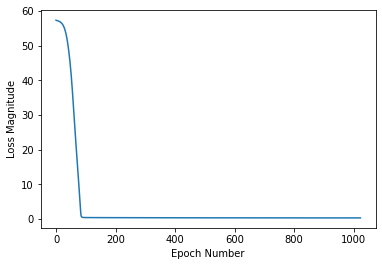

In [401]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [402]:
y_ = model.predict(X_test)
print(mean_squared_error(y_test, y_, squared=False))
pd.DataFrame(y_, y_test)


0.2914768


,0
Umur Harapan Hidup Saat Lahir (UHH) (2021),
72.180000,71.998146
71.599998,71.610268
70.029999,70.072624
73.529999,72.840660
66.989998,67.215408
...,...
71.239998,71.183273
72.820000,72.786644
68.370003,68.548210


In [265]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# model.fit(fitur, X_train)
# print(model.coef_)

In [174]:

def mse(coef, x, y):
    return np.mean((np.dot(x, coef) - y)**2)/2
 
def gradients(coef, x, y):
    return np.mean(x.transpose()*(np.dot(x, coef) - y), axis = 1)
 
def multilinear_regression(coef, x, y, lr, b1 = 0.9, b2 = 0.999, epsilon = 1e-8):
    prev_error = 0
    m_coef = np.zeros(coef.shape)
    v_coef = np.zeros(coef.shape)
    moment_m_coef = np.zeros(coef.shape)
    moment_v_coef = np.zeros(coef.shape)
    t = 0
 
    while True:
        error = mse(coef, x, y)
        if abs(error - prev_error) <= epsilon:
            break
        prev_error = error
        grad = gradients(coef, x, y)
        t += 1
        m_coef = b1 * m_coef + (1-b1)*grad
        v_coef = b2 * v_coef + (1-b2)*grad**2
        moment_m_coef = m_coef / (1-b1**t)
        moment_v_coef = v_coef / (1-b2**t)
 
        delta = ((lr / moment_v_coef**0.5 + 1e-8) *
                 (b1 * moment_m_coef + (1-b1)*grad/(1-b1**t)))
 
        coef = np.subtract(coef, delta)
    return coef
 
coef =[]
for i in range(0,20):
    coef.append(0)
coef = np.array(coef)
c = multilinear_regression(coef, fitur, label, 1e-1)
print(c)

Harapan Lama Sekolah (2019)                                       -0.006803
Harapan Lama Sekolah (2020)                                       -0.007127
Harapan Lama Sekolah (2021)                                       -0.007226
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)       0.035005
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)      0.030745
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)      0.033311
Rata-rata Lama Sekolah (2019)                                     -0.065510
Rata-rata Lama Sekolah (2020)                                     -0.065747
Rata-rata Lama Sekolah (2021)                                     -0.057276
Umur Harapan Hidup Saat Lahir (UHH) (2019)                         0.489690
Umur Harapan Hidup Saat Lahir (UHH) (2020)                         0.492794
Indeks Pembangunan Manusia (2019)                                  0.077043
Indeks Pembangunan Manusia (2020)                                  0.075832
Indeks Pemba

In [206]:
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

In [268]:
model = XGBRegressor()
cv = RepeatedKFold(n_splits=5, n_repeats=5,random_state=1)

In [177]:
r = Lasso(alpha=0, normalize=True, fit_intercept=True)
r.fit(X_train, y_train)
y_pred = r.predict(X_test)

Lasso(alpha=0, normalize=True)

In [247]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
poly.fit_transform(fitur)

array([[2.541602  , 2.5649493 , 2.5741377 , ..., 0.32011953, 0.37636778,
        0.49231994],
       [2.5892668 , 2.590017  , 2.5907671 , ..., 0.09001583, 0.03234565,
        0.04777856],
       [2.5710843 , 2.5718486 , 2.5726123 , ..., 0.71956754, 0.74090004,
        0.47335875],
       ...,
       [2.5257287 , 2.5265284 , 2.53449   , ..., 0.25078526, 0.37838125,
        0.21607947],
       [2.503074  , 2.503892  , 2.5071573 , ..., 0.854453  , 0.7146429 ,
        0.898955  ],
       [2.5265284 , 2.539237  , 2.5502262 , ..., 0.04166346, 0.04671733,
        0.50839037]], dtype=float32)

In [273]:
from sklearn.svm import SVR
model = LinearRegression()
# model.fit(X_train, y_train)
scores = np.sqrt(np.abs(cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error',cv=cv)))

print("Akurasi model SVC untuk tiap fold :",scores)
print("Akurasi model SVC untuk 5-folds CV:", scores.mean())

Akurasi model SVC untuk tiap fold : [0.01471431 0.02091477 0.03042238 0.01893824 0.03245579 0.01982702
 0.03279437 0.0380478  0.02091158 0.02886503 0.02403116 0.02822626
 0.0278122  0.01697038 0.02608957 0.02947899 0.01734327 0.01901674
 0.01783732 0.02566655 0.03195731 0.0155091  0.02904537 0.02913689
 0.03446726]
Akurasi model SVC untuk 5-folds CV: 0.025219186186533547


In [253]:
scores = cross_val_score(model, fitur, label, cv = 5)
print("Akurasi model LinearRegression untuk tiap fold :",scores)
print("Akurasi model LinearRegression untuk 5-folds CV:", scores.mean())

Akurasi model LinearRegression untuk tiap fold : [0.99988955 0.99994888 0.99985303 0.9999042  0.99989239]
Akurasi model LinearRegression untuk 5-folds CV: 0.9998976111209001


Hasil evaluasi model dengan metriks R2 Score, RMSE, MSE, dan MAE

In [255]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
r2score = model.score(X_test, y_pred)
print('R2 SCORE: %.4f'%r2score)
print('RMSE    : %.4f'%rmse)
print('MSE     : %.4f'%mse)
print('MAE     : %.4f'%mae)

R2 SCORE: 1.0000
RMSE    : 0.0203
MSE     : 0.0004
MAE     : 0.0149


Terakhir. Muat ```Data_Test.csv```, atur kolom ```Id``` sebagai indeks, dan hapus kolom selain angka. Setelah itu ```data_test``` ditransformasikan dengan fungsi ```transform(data)``` dan lakukan prediksi dengan model yang sudah dibangun (```model```)

In [263]:
data_test = pd.read_csv('Data_Test.csv').set_index('Id').select_dtypes(include='number')

data_test = transform(data_test)

    pred = model.predict(data_test)

    df = pd.DataFrame(pred, index=data_test.index, columns=['Umur Harapan Hidup Saat Lahir (UHH) (2021)'])
df.to_csv('submission_ku.csv')
# data_test.to_csv('tes.csv')
print(df)


     Umur Harapan Hidup Saat Lahir (UHH) (2021)
Id                                             
0                                     71.185021
4                                     68.088742
6                                     73.359745
7                                     70.493805
14                                    71.527614
..                                          ...
501                                   76.280304
503                                   68.231637
506                                   73.864451
509                                   73.621416
512                                   63.574786

[106 rows x 1 columns]


In [31]:
pred = pd.read_csv('hasil2.csv', header=None)
# pred = pred.rename(columns={0:'Umur Harapan Hidup Saat Lahir (UHH) (2021)'})
pred = pd.DataFrame({'Id':data_test.index.values, "Umur Harapan Hidup Saat Lahir (UHH) (2021)":pred[0].tolist()}).set_index('Id')
print(pred)
# df = pd.concat([data_test.index, pred['Umur Harapan Hidup Saat Lahir (UHH) (2021)']])
# print(df)
pred.to_csv('submission-late-1.csv')

     Umur Harapan Hidup Saat Lahir (UHH) (2021)
Id                                             
0                                        71.207
4                                        68.064
6                                        73.332
7                                        70.500
14                                       71.494
..                                          ...
501                                      76.309
503                                      68.192
506                                      73.815
509                                      73.629
512                                      65.148

[106 rows x 1 columns]


In [262]:
pd.read_csv('submission6.csv')

,Id,Umur Harapan Hidup Saat Lahir (UHH) (2021)
0,0,71.189853
1,4,68.088373
2,6,73.354401
3,7,70.475794
4,14,71.525399
...,...,...
101,501,76.285026
102,503,68.227000
103,506,73.852148
104,509,73.622744
